Libraries Used

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Data Import(Locally)

In [51]:
generation_df_1 = pd.read_csv(r'C:\Users\anmol\Downloads\Plant_1_Generation_Data.csv')
weather_df_1 = pd.read_csv(r'C:\Users\anmol\Downloads\Plant_1_Weather_Sensor_Data.csv')
generation_df_2 = pd.read_csv(r'C:\Users\anmol\Downloads\Plant_2_Generation_Data.csv')
weather_df_2 = pd.read_csv(r'C:\Users\anmol\Downloads\Plant_2_Weather_Sensor_Data.csv')

Data Exploration

In [52]:
print("--- Plant 1 Generation Data Info ---")
generation_df_1.info()
print("\n--- Plant 1 Weather Data Info ---")
weather_df_1.info()
print("\n--- Plant 2 Generation Data Info ---")
generation_df_2.info()
print("\n--- Plant 2 Weather Data Info ---")
weather_df_2.info()

--- Plant 1 Generation Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB

--- Plant 1 Weather Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE

In [53]:
print("\n--- Plant 1 Generation Data Head ---")
print(generation_df_1.head())
print("\n--- Plant 1 Weather Data Head ---")
print(weather_df_1.head())


--- Plant 1 Generation Data Head ---
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  

--- Plant 1 Weather Data Head ---
             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   41350

Data Pre-Processing

In [54]:
generation_df_1['DATE_TIME'] = pd.to_datetime(generation_df_1['DATE_TIME'], format='%d-%m-%Y %H:%M')
weather_df_1['DATE_TIME'] = pd.to_datetime(weather_df_1['DATE_TIME'])
generation_df_2['DATE_TIME'] = pd.to_datetime(generation_df_2['DATE_TIME'])
weather_df_2['DATE_TIME'] = pd.to_datetime(weather_df_2['DATE_TIME'])

merged_df_1 = pd.merge(generation_df_1, weather_df_1, on='DATE_TIME', how='inner')
merged_df_2 = pd.merge(generation_df_2, weather_df_2, on='DATE_TIME', how='inner')

In [72]:
merged_df_1.columns

Index(['DATE_TIME', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR'],
      dtype='object')

In [55]:
print("\n--- Plant 1 Merged Data Info ---")
print(merged_df_1.info())
print("\n--- Plant 2 Merged Data Info ---")
print(merged_df_2.info())


--- Plant 1 Merged Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   PLANT_ID_x           68774 non-null  int64         
 2   SOURCE_KEY_x         68774 non-null  object        
 3   DC_POWER             68774 non-null  float64       
 4   AC_POWER             68774 non-null  float64       
 5   DAILY_YIELD          68774 non-null  float64       
 6   TOTAL_YIELD          68774 non-null  float64       
 7   PLANT_ID_y           68774 non-null  int64         
 8   SOURCE_KEY_y         68774 non-null  object        
 9   AMBIENT_TEMPERATURE  68774 non-null  float64       
 10  MODULE_TEMPERATURE   68774 non-null  float64       
 11  IRRADIATION          68774 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)


In [56]:
merged_df_1 = merged_df_1.drop(['PLANT_ID_x', 'PLANT_ID_y', 'SOURCE_KEY_x', 'SOURCE_KEY_y'], axis=1)
merged_df_2 = merged_df_2.drop(['PLANT_ID_x', 'PLANT_ID_y', 'SOURCE_KEY_x', 'SOURCE_KEY_y'], axis=1)

#Irrelevant features w.r.t. to the problem statement and models.

EDA (Exploratory Data Analysis)

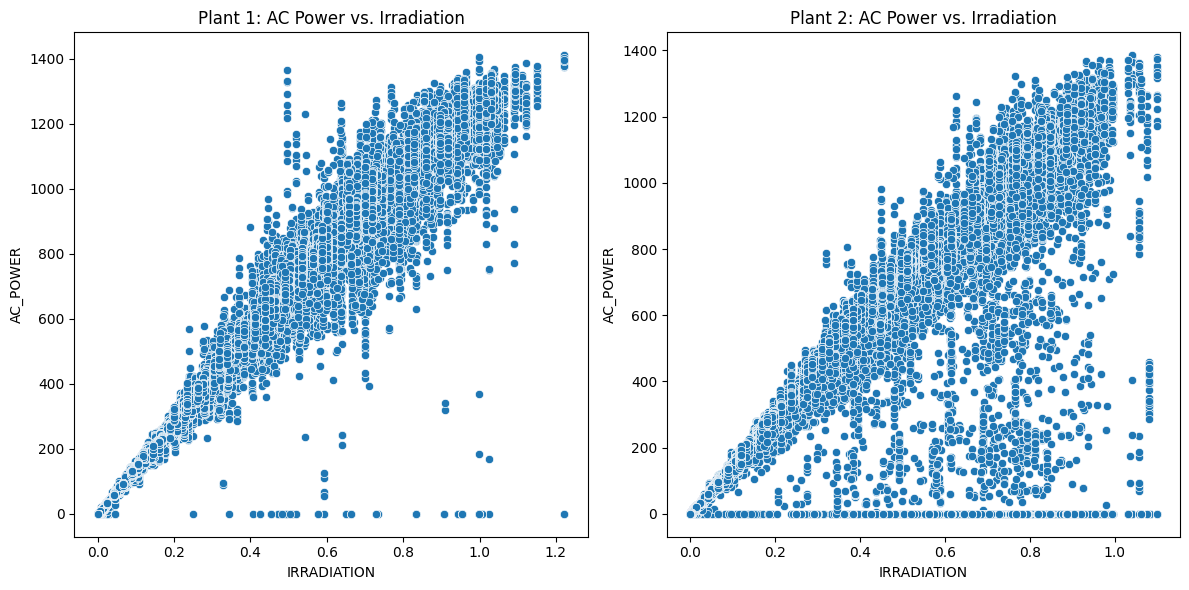

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='IRRADIATION', y='AC_POWER', data=merged_df_1)
plt.title('Plant 1: AC Power vs. Irradiation')
plt.subplot(1, 2, 2)
sns.scatterplot(x='IRRADIATION', y='AC_POWER', data=merged_df_2)
plt.title('Plant 2: AC Power vs. Irradiation')
plt.tight_layout()
plt.show()

In [58]:
merged_df_1['HOUR'] = merged_df_1['DATE_TIME'].dt.hour
merged_df_2['HOUR'] = merged_df_2['DATE_TIME'].dt.hour

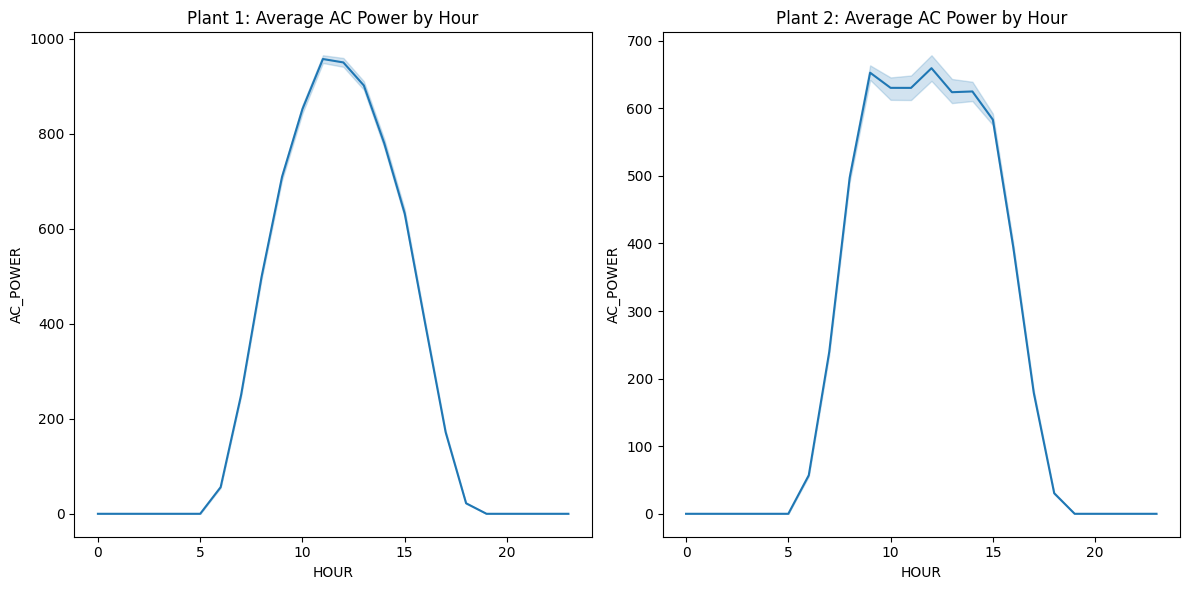

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='HOUR', y='AC_POWER', data=merged_df_1)
plt.title('Plant 1: Average AC Power by Hour')
plt.subplot(1, 2, 2)
sns.lineplot(x='HOUR', y='AC_POWER', data=merged_df_2)
plt.title('Plant 2: Average AC Power by Hour')
plt.tight_layout()
plt.show()

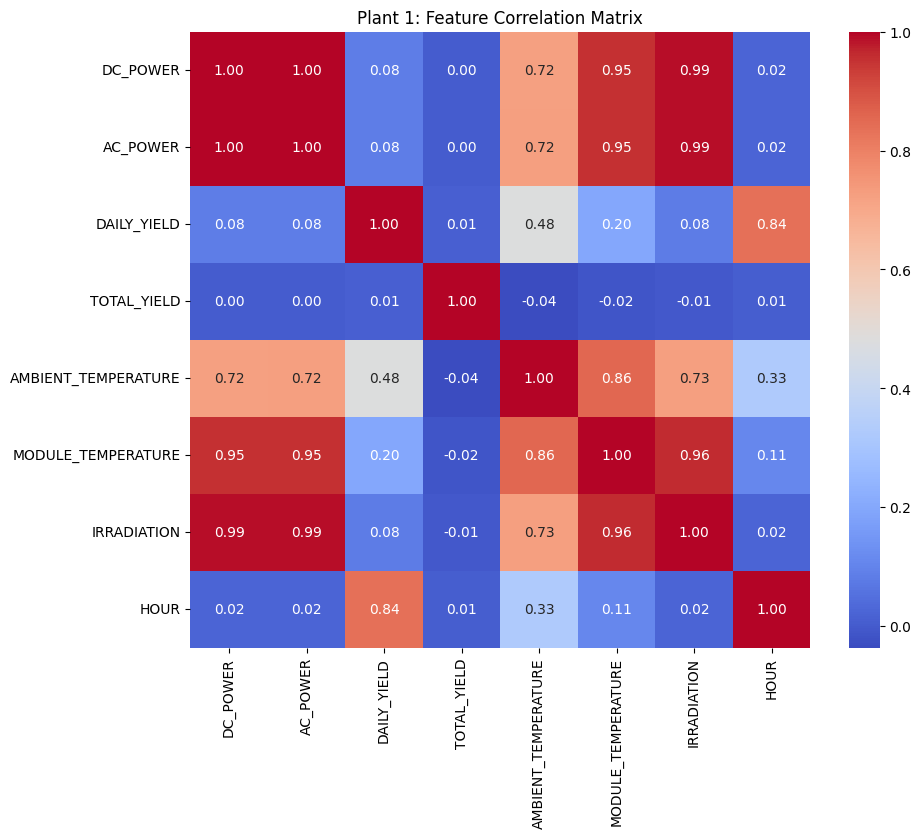

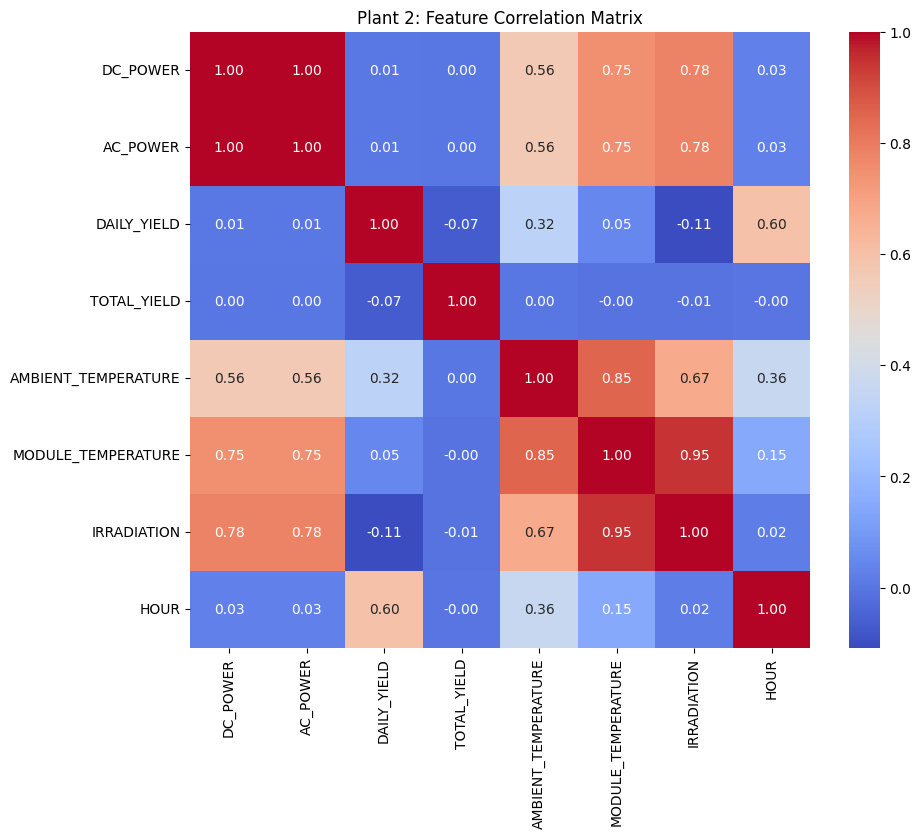

In [73]:
#Plant 1
correlation_columns_1 = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR']
correlation_df_1 = merged_df_1[correlation_columns_1]

correlation_matrix_1 = correlation_df_1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Plant 1: Feature Correlation Matrix')
plt.show()


# PLant 2
correlation_columns_2 = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR']
correlation_df_2 = merged_df_2[correlation_columns_2]
correlation_matrix_2 = correlation_df_2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Plant 2: Feature Correlation Matrix')
plt.show()

Model Training and Evaluation

In [60]:
features = ['IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'HOUR']
target = 'AC_POWER'

X_1 = merged_df_1[features]
y_1 = merged_df_1[target]
X_2 = merged_df_2[features]
y_2 = merged_df_2[target]

# And split the data for both plants.
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)


Linear Regression

In [61]:
def linear_regression(X_train, y_train, X_test, y_test, plant_name):
    
    print(f"--- Training and Evaluating Linear Regression for {plant_name} ---")
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'{plant_name}: Actual vs. Predicted (Linear Regression)')
    plt.xlabel('Actual AC Power')
    plt.ylabel('Predicted AC Power')
    plt.show()
    
    return mae, r2, model

Decision Trees

In [62]:
def decision_tree(X_train, y_train, X_test, y_test, plant_name):
    
    print(f"\n--- Training and Evaluating Decision Tree for {plant_name} ---")
    
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'{plant_name}: Actual vs. Predicted (Decision Tree)')
    plt.xlabel('Actual AC Power')
    plt.ylabel('Predicted AC Power')
    plt.show()
    
    return mae, r2, model

Random Forest

In [63]:
def random_forest(X_train, y_train, X_test, y_test, plant_name):
    
    print(f"\n--- Training and Evaluating Random Forest for {plant_name} ---")
    
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'{plant_name}: Actual vs. Predicted (Random Forest)')
    plt.xlabel('Actual AC Power')
    plt.ylabel('Predicted AC Power')
    plt.show()
    
    return mae, r2, model

Running Models

--- Training and Evaluating Linear Regression for Plant 1 ---
Mean Absolute Error (MAE): 26.30
R-squared (R2): 0.98


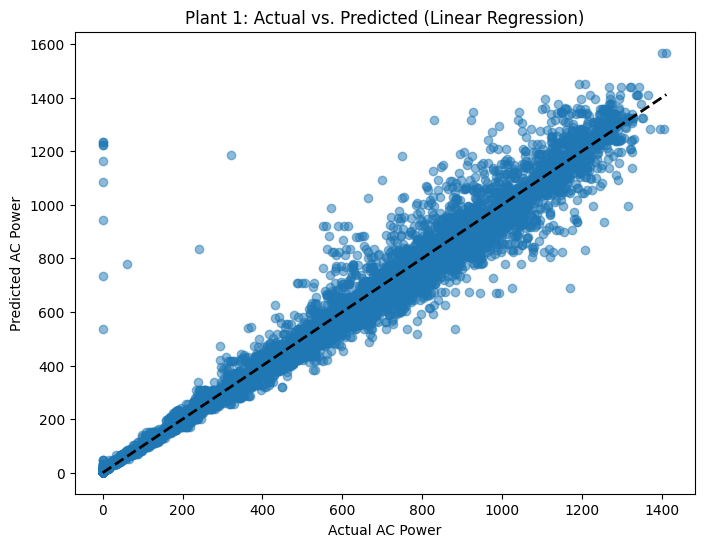


--- Training and Evaluating Decision Tree for Plant 1 ---
Mean Absolute Error (MAE): 16.37
R-squared (R2): 0.99


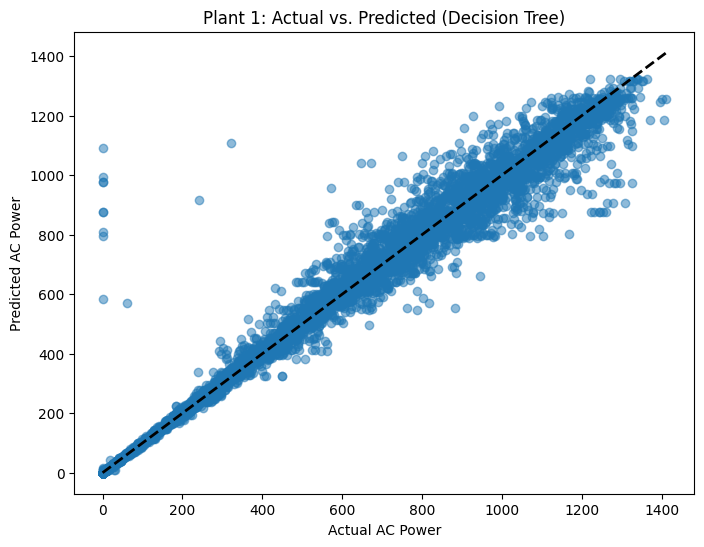


--- Training and Evaluating Random Forest for Plant 1 ---
Mean Absolute Error (MAE): 16.37
R-squared (R2): 0.99


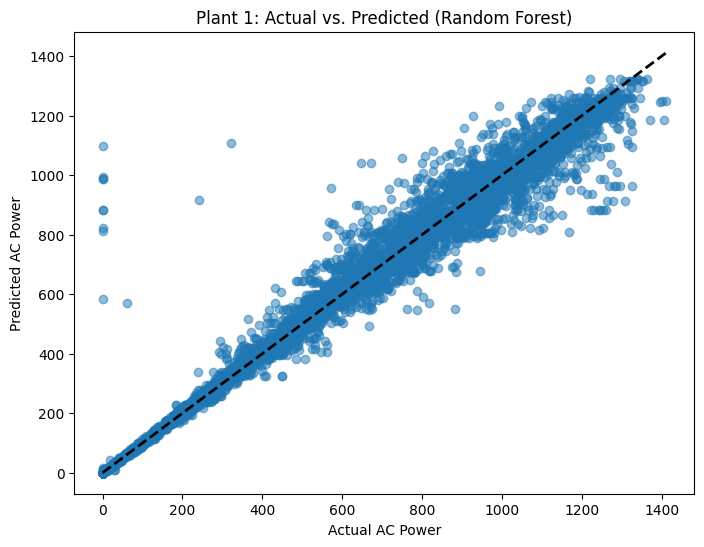

--- Training and Evaluating Linear Regression for Plant 2 ---
Mean Absolute Error (MAE): 125.19
R-squared (R2): 0.62


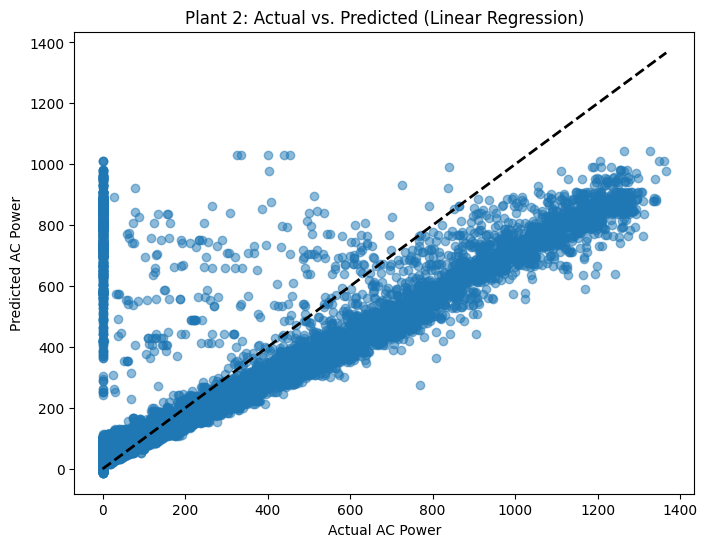


--- Training and Evaluating Decision Tree for Plant 2 ---
Mean Absolute Error (MAE): 81.27
R-squared (R2): 0.68


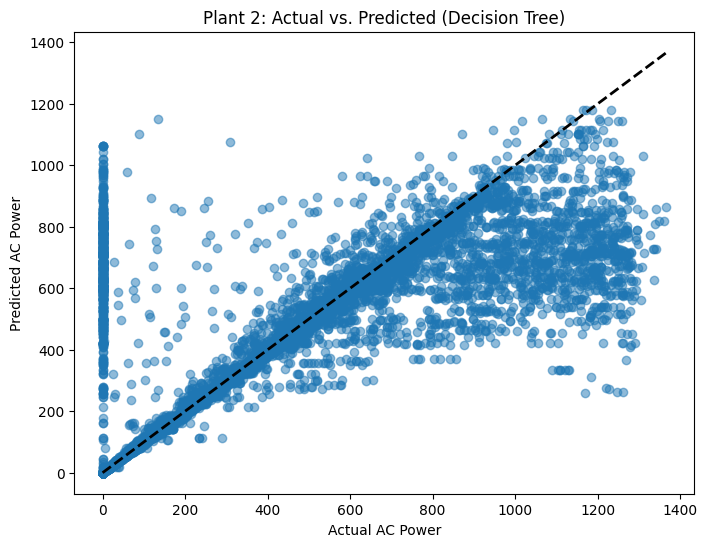


--- Training and Evaluating Random Forest for Plant 2 ---
Mean Absolute Error (MAE): 81.21
R-squared (R2): 0.68


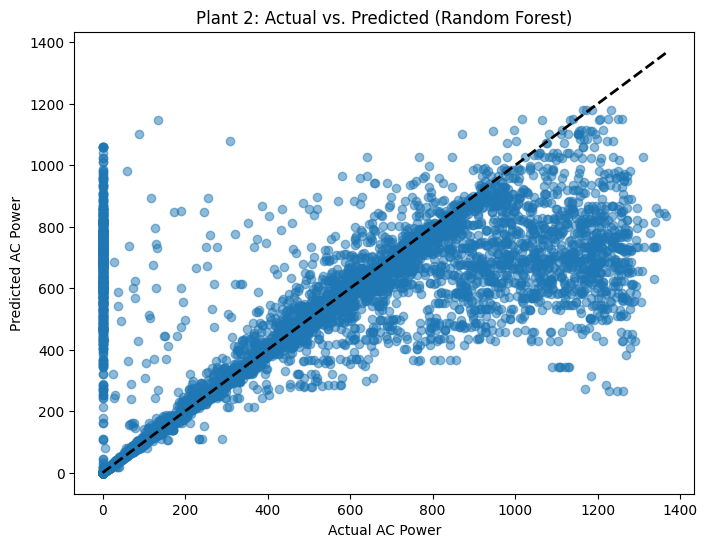

In [64]:
#Plant 1
mae_lr_1, r2_lr_1, model_lr_1 = linear_regression(X_train_1, y_train_1, X_test_1, y_test_1, "Plant 1")
mae_dt_1, r2_dt_1, model_dt_1 = decision_tree(X_train_1, y_train_1, X_test_1, y_test_1, "Plant 1")
mae_rf_1, r2_rf_1, model_rf_1 = random_forest(X_train_1, y_train_1, X_test_1, y_test_1, "Plant 1")

# Plant 2
mae_lr_2, r2_lr_2, model_lr_2 = linear_regression(X_train_2, y_train_2, X_test_2, y_test_2, "Plant 2")
mae_dt_2, r2_dt_2, model_dt_2 = decision_tree(X_train_2, y_train_2, X_test_2, y_test_2, "Plant 2")
mae_rf_2, r2_rf_2, model_rf_2 = random_forest(X_train_2, y_train_2, X_test_2, y_test_2, "Plant 2")


Summary

In [65]:
print("\n" + "="*50)
print("             Model Performance Summary")
print("="*50)

summary_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Plant 1 MAE': [mae_lr_1, mae_dt_1, mae_rf_1],
    'Plant 1 R2': [r2_lr_1, r2_dt_1, r2_rf_1],
    'Plant 2 MAE': [mae_lr_2, mae_dt_2, mae_rf_2],
    'Plant 2 R2': [r2_lr_2, r2_dt_2, r2_rf_2]
}
summary_df = pd.DataFrame(summary_data)
print(summary_df)
print("="*50)


             Model Performance Summary
               Model  Plant 1 MAE  Plant 1 R2  Plant 2 MAE  Plant 2 R2
0  Linear Regression    26.297966    0.980029   125.187875    0.616115
1      Decision Tree    16.374379    0.986513    81.271843    0.677376
2      Random Forest    16.373120    0.986483    81.209354    0.677918


Sample Test Case

In [66]:
print("\n--- Making a Simple Prediction with the Best Model (Random Forest) ---")
new_data_point = pd.DataFrame({
    'IRRADIATION': [1.0],  # Maximium Irradiation (for simulating a sunny day)
    'AMBIENT_TEMPERATURE': [35.0], 
    'MODULE_TEMPERATURE': [45.0], 
    'HOUR': [12] # Midday as in lineplot maximum power was generated around 12 which corresponds to maximum irradiation making this sample more realistic
})
predicted_power = model_rf_1.predict(new_data_point)
print(f"Predicted AC Power for Plant 1 under these conditions: {predicted_power[0]:.2f} kW")


--- Making a Simple Prediction with the Best Model (Random Forest) ---
Predicted AC Power for Plant 1 under these conditions: 1225.74 kW
